In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [2]:
airbnb<-read.csv('data//airbnb.csv',sep = ',')

Mostrar las primeras 6 filas del dataframe

In [3]:
#Mostrar las primeras 6 filas
airbnb[1:6,]

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [4]:
# Nuevo vector con los nombres de las columnas que queremos tener
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
# Asigno los nuevos nombres de columnas
names(airbnb) <- newnames

In [5]:
# Compruebo que se han cambiado correctamente los nombres de las columnas
colnames(airbnb)

[1] "CodigoPostal"   "Barrio"         "TipoPropiedad"  "TipoAlquiler"  
 [5] "MaxOcupantes"   "NumBanyos"      "NumDormitorios" "NumCamas"      
 [9] "TipoCama"       "Comodidades"    "PiesCuadrados"  "Precio"        
[13] "Puntuacion"

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [6]:
# Crear nueva columna "MetrosCuadrados"
airbnb$MetrosCuadrados <- airbnb$PiesCuadrados * 0.092903

In [7]:
# Comprobar los datos insertados
airbnb[1:10,c("CodigoPostal", "PiesCuadrados", "MetrosCuadrados")]

,CodigoPostal,PiesCuadrados,MetrosCuadrados
,<fct>,<int>,<dbl>
1,28004,NA,NA
2,28004,NA,NA
3,28004,NA,NA
4,28004,NA,NA
5,28015,538,49.98181
6,28004,NA,NA
7,28004,NA,NA
8,28004,NA,NA
9,28015,700,65.03210


Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [8]:
# Arreglar valores de Columna Código Postal
airbnb$CodigoPostal[airbnb$CodigoPostal == '28' | airbnb$CodigoPostal == "-" | airbnb$CodigoPostal == ""]<-NA
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28002 28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28004\n28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28004 28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051\n28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == '28051 28051']<-'28051'
airbnb$CodigoPostal[airbnb$CodigoPostal == 'Madrid\n28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == 'Madrid 28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal == '2815']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal == '280013']<-'28013'
airbnb$CodigoPostal[!grepl("28", airbnb$CodigoPostal)]<-NA

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [9]:
#Mostrar los Códigos Postales que tenemos
na.omit(unique(airbnb$CodigoPostal))

[1] 28004 28015 28013 28005 28012 28014 28045 28007 28028 28009 28001 28006
[13] 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025 28019
[25] 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026 28058
[37] 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022 28042
[49] 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056 28060
[61] 28052
attr(,"na.action")
[1] 8
attr(,"class")
[1] omit
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [10]:
# Creamos una tabla para realizar los conteos
tablaCodigosPostales <- table(droplevels(airbnb$CodigoPostal))

strCodigosMasEntradas = paste( names(tablaCodigosPostales[order(-tablaCodigosPostales)][1:5]), collapse=', ')
strValoresMasEntradas = paste( as.character(tablaCodigosPostales[order(-tablaCodigosPostales)][1:5]), collapse=', ')
print(paste('Los 5 códigos postales con más entradas: ', 
            strCodigosMasEntradas, 
            ' y sus valores son: ', 
            strValoresMasEntradas))

strCodigosMenosEntradas = paste( names(tablaCodigosPostales[order(tablaCodigosPostales)][1:5]), collapse=', ')
strValoresMenosEntradas = paste( as.character(tablaCodigosPostales[order(tablaCodigosPostales)][1:5]), collapse=', ')
print(paste('Los 5 códigos postales con menos entradas: ', 
            strCodigosMenosEntradas, 
            ' y sus valores son: ', 
            strValoresMenosEntradas ))

[1] "Los 5 códigos postales con más entradas:  28012, 28004, 28005, 28013, 28014  y sus valores son:  2060, 1796, 1195, 1020, 630"
[1] "Los 5 códigos postales con menos entradas:  28048, 28052, 28056, 28058, 28060  y sus valores son:  1, 1, 1, 1, 1"


¿Cuales son los barrios que hay en el código postal 28012?

In [11]:
# Obtenemos los nombres (únicos) de los barrios que tienen el código postal 28012
strBarrios = paste(as.character(na.omit(unique(airbnb$Barrio[airbnb$CodigoPostal == "28012"]))), collapse=', ')
paste('Los barrios con el código postal 28012 son: ', strBarrios)

[1] "Los barrios con el código postal 28012 son:  Sol, Acacias, Palos de Moguer, Embajadores, Cortes, Palacio, Universidad, Delicias, Arapiles, Atocha, Goya"

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postao 28012? Asumiendo que el identificador de Barrio sea correcto, ¿es fiable la columna de código postal?

In [12]:
# Creamos un DataFrame con las columnas Barrio y CodigoPostal
dfBarrio <- na.omit(airbnb[airbnb$CodigoPostal == '28012' , c("Barrio", "CodigoPostal")])
print("Con el resumen vemos el número de entradas en cada barrio del Código Postal 28012")
summary(dfBarrio$Barrio)[as.numeric(summary(dfBarrio$Barrio)) > 0]

print(
    paste(
        "No creo fiable la columna Código Postal, porque parece que estos barrios no son limitrofes unos con otros.",
        "Tal y como se puede comprobar en cualquier mapa de los barrios de Madrid."
    )
)


[1] "Con el resumen vemos el número de entradas en cada barrio del Código Postal 28012"


Embajadores             Sol          Cortes Palos de Moguer         Palacio 
           1449             301             216              46              27 
        Acacias     Universidad        Arapiles          Atocha        Delicias 
             13               4               1               1               1 
           Goya 
              1

[1] "No creo fiable la columna Código Postal, porque parece que estos barrios no son limitrofes unos con otros. Tal y como se puede comprobar en cualquier mapa de los barrios de Madrid."


¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [13]:
print( paste( "Hay ", 
             length(levels(airbnb$Barrio)), 
             " barrios distintos en el dataset AirBNB: ", 
             paste(levels(airbnb$Barrio), collapse=', ')))

[1] "Hay  125  barrios distintos en el dataset AirBNB:  Abrantes, Acacias, Adelfas, Aeropuerto, Aguilas, Alameda de Osuna, Almagro, Almenara, Almendrales, Aluche, Ambroz, Amposta, Apostol Santiago, Arapiles, Aravaca, Arcos, Argüelles, Atocha, Bellas Vistas, Berruguete, Buenavista, Butarque, Campamento, Canillas, Canillejas, Cármenes, Casa de Campo, Casco Histórico de Barajas, Casco Histórico de Vallecas, Casco Histórico de Vicálvaro, Castellana, Castilla, Castillejos, Chopera, Ciudad Jardín, Ciudad Universitaria, Colina, Comillas, Concepción, Corralejos, Cortes, Costillares, Cuatro Caminos, Cuatro Vientos, Delicias, El Goloso, El Plantío, El Viso, Embajadores, Entrevías, Estrella, Fontarrón, Fuente del Berro, Fuentelareina, Gaztambide, Goya, Guindalera, Hellín, Hispanoamérica, Ibiza, Imperial, Jerónimos, Justicia, La Paz, Legazpi, Lista, Los Angeles, Los Rosales, Lucero, Marroquina, Media Legua, Mirasierra, Moscardó, Niño Jesús, Nueva España, Numancia, Opañel, Orcasitas, Orcasur, Pacíf

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [14]:
tablaBarrios <- table(airbnb$Barrio)
paste("Los 5 barrios con mayor número de entradas son: ", 
      paste(names(tablaBarrios[order(-tablaBarrios)][1:5]), collapse=', '))

[1] "Los 5 barrios con mayor número de entradas son:  Embajadores, Universidad, Palacio, Sol, Justicia"

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [15]:
tablaTipoAlquiler <- table(airbnb$TipoAlquiler)
print(
    paste(
        "Hay ",
        length(names(tablaTipoAlquiler)),
        " tipos distintos de alquileres: ",
        paste(names(tablaTipoAlquiler), collapse = ', ')
    )
)
for(i in 1:length(names(tablaTipoAlquiler))){
    print(paste(names(tablaTipoAlquiler)[i], " tiene ", as.numeric(tablaTipoAlquiler)[i], " entradas."))
}

[1] "Hay  3  tipos distintos de alquileres:  Entire home/apt, Private room, Shared room"
[1] "Entire home/apt  tiene  7903  entradas."
[1] "Private room  tiene  5113  entradas."
[1] "Shared room  tiene  191  entradas."


Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 20
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

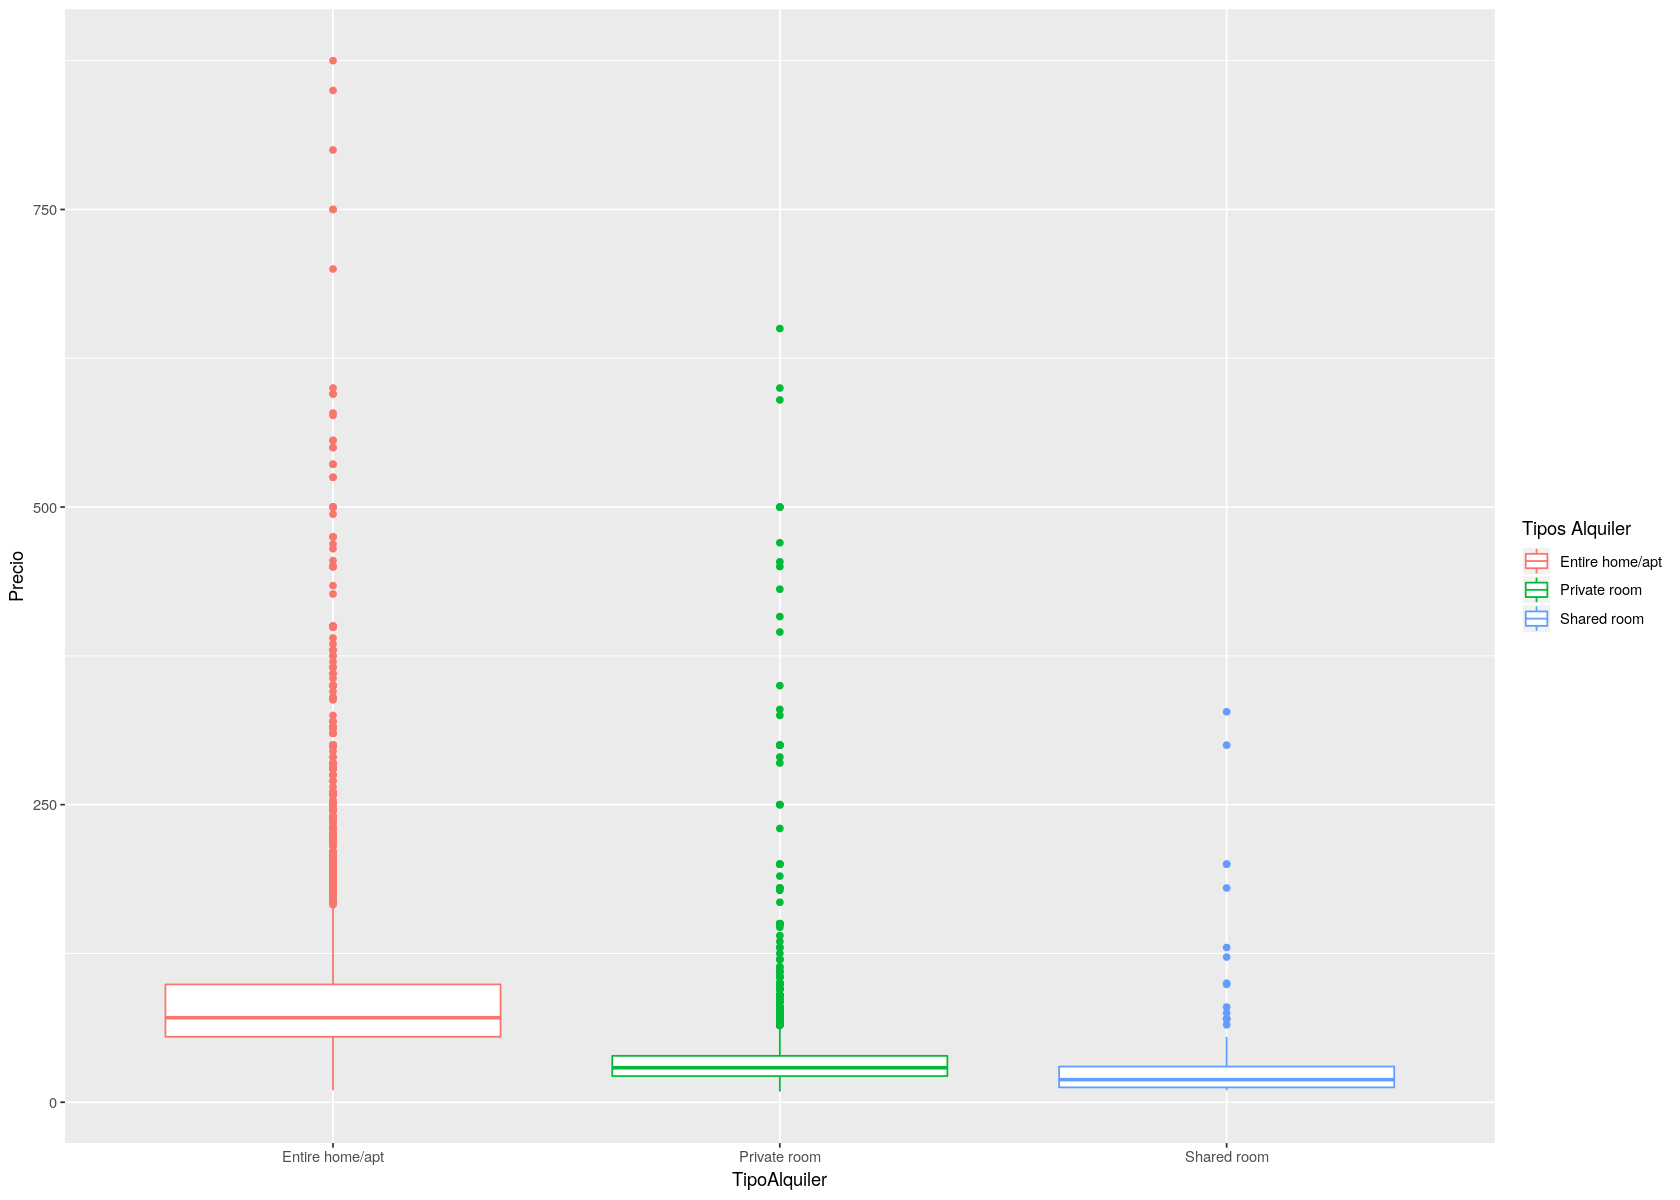

In [16]:
options(repr.plot.height=10,repr.plot.width=14)
ggplot(data=airbnb,aes(x=TipoAlquiler, y=Precio,color=TipoAlquiler))+geom_boxplot()+
 scale_color_discrete(name="Tipos Alquiler")
theme(tex=element_text(size=20))

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [17]:
# Creo un dataframe con los datos que quiero analizar
dfAlquilerPrecio <- airbnb[, c("TipoAlquiler", "Precio")]

#Creo un vector para ir poniendo los precios medios de cada tipo de alquiler
vectorMedias <- c(0, 0, 0)
names(vectorMedias) <- levels(dfAlquilerPrecio$TipoAlquiler)
#Asigno el valor a cada uno de los tipos de alquiler
for (name in names(vectorMedias)){
    vectorMedias[name] = round( mean(na.omit(dfAlquilerPrecio[levels(dfAlquilerPrecio$TipoAlquiler) == name, "Precio"])), 2 )
}
#Podemos comprobar el resultado
print("Precio Medio por cada tipo de alquiler: ")
print(vectorMedias)
#vectorMedias
print(
    paste(
        "Asumiendo el valor de Shapiro:",
        round(as.numeric(shapiro.test(vectorMedias)["p.value"]), 2),
        " como un valor suficientemente alto como para considerar que podemos estar frente a una distribución Gaussiana.",
        " Usamos el test ANOVA por tener más de 2 valores para el estudio."
    )
)

# Realizamos los cálculos para hacer el test Anova
vectorElementosEntire <- na.omit(dfAlquilerPrecio$Precio[levels(dfAlquilerPrecio$TipoAlquiler) == 'Entire home/apt'])
vectorElementosPrivate <- na.omit(dfAlquilerPrecio$Precio[levels(dfAlquilerPrecio$TipoAlquiler) == 'Private room'])
vectorElementosShared <- na.omit(dfAlquilerPrecio$Precio[levels(dfAlquilerPrecio$TipoAlquiler) == 'Shared room'])

dfValoresUnidos <- rbind(
    data.frame(value=vectorElementosEntire,cl='Entire'),
    data.frame(value=vectorElementosPrivate,cl='Private'),
    data.frame(value=vectorElementosShared,cl='Shared'))

summary(aov( value ~ cl, data=dfValoresUnidos))

print(
    paste(
        "Tras el Test ANOVA, no se aprecia una diferencia estadística significativa. ",
        "El test nos devuelve un p-valor de 0.627, no es un resultado alto."
    )
)

[1] "Precio Medio por cada tipo de alquiler: "
Entire home/apt    Private room     Shared room 
          65.27           66.35           66.16 
[1] "Asumiendo el valor de Shapiro: 0.32  como un valor suficientemente alto como para considerar que podemos estar frente a una distribución Gaussiana.  Usamos el test ANOVA por tener más de 2 valores para el estudio."


               Df   Sum Sq Mean Sq F value Pr(>F)
cl              2     2933    1467   0.468  0.627
Residuals   13195 41395500    3137               

[1] "Tras el Test ANOVA, no se aprecia una diferencia estadística significativa.  El test nos devuelve un p-valor de 0.627, no es un resultado alto."


Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [18]:
# Crear un dataframe con todos los registros cuyo tipo de alquiler sea  'Entire home/apt'
airbnb_entire <- airbnb[ airbnb$TipoAlquiler ==  'Entire home/apt' ,]
summary(airbnb_entire)

  CodigoPostal          Barrio                TipoPropiedad 
 28012  :1435   Embajadores:1228   Apartment         :6995  
 28004  :1271   Universidad: 984   House             : 327  
 28005  : 803   Palacio    : 769   Loft              : 250  
 28013  : 721   Sol        : 701   Condominium       : 188  
 28014  : 473   Cortes     : 574   Other             : 111  
 (Other):2979   Justicia   : 534   Serviced apartment:  11  
 NA's   : 221   (Other)    :3113   (Other)           :  21  
          TipoAlquiler   MaxOcupantes      NumBanyos     NumDormitorios  
 Entire home/apt:7903   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Private room   :   0   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Shared room    :   0   Median : 4.000   Median :1.000   Median : 1.000  
                        Mean   : 4.051   Mean   :1.241   Mean   : 1.463  
                        3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
                        Max.   :16.000   Max.   :6.500   Max.   :10.

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [19]:
tablaBarriosEntire <- table(airbnb_entire$Barrio)
paste("Los 5 barrios con mayor número de entradas son: ", 
      paste(names(tablaBarriosEntire[order(-tablaBarriosEntire)][1:5]), collapse=', '))

[1] "Los 5 barrios con mayor número de entradas son:  Embajadores, Universidad, Palacio, Sol, Cortes"

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

In [20]:
# Creo un dataframe para tener los datos que necesito
dfBarriosPrecio <- airbnb_entire[, c('Barrio', 'Precio')]
#Obtengo por barrio el precio medio
dfBarrioPrecioMedio <- aggregate(Precio ~ Barrio, dfBarriosPrecio, mean, na.rm = T )
# Inserto los datos en un vector para mejorar la facilidad a la hora de la presentación
vectorBarriosMasCaros <- round( c(dfBarrioPrecioMedio[order(-dfBarrioPrecioMedio$Precio), 'Precio'][1:5]), 2)
names(vectorBarriosMasCaros) <- c(as.character(dfBarrioPrecioMedio[order(-dfBarrioPrecioMedio$Precio), 'Barrio'][1:5]))
print("Los 5 barrios con mayor precio medio y su valor son: ")
print(vectorBarriosMasCaros)




[1] "Los 5 barrios con mayor precio medio y su valor son: "
      Palomas Fuentelareina     Recoletos    El Plantío    Castellana 
       309.75        180.00        161.93        150.00        141.39 


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [21]:
# Usaremos una tabla para conseguir los datos de los conteos
tablaBarrios <- table(airbnb_entire[, c('Barrio')])
# Creamos un data frame con esos datos
dfBarriosFreq <- data.frame(Barrio=names(tablaBarrios), Frecuencia=as.numeric(tablaBarrios))
# Hacemos un merge por el campo en común (Barrio)
dfBarriosPrecioFreq <- merge(dfBarriosFreq, dfBarrioPrecioMedio, by='Barrio')
print("El DataFrame resultante de unir los precios medios de los barrios y los números de apartamentos por barrio es: ")
str(dfBarriosPrecioFreq)
summary(dfBarriosPrecioFreq)


[1] "El DataFrame resultante de unir los precios medios de los barrios y los números de apartamentos por barrio es: "
'data.frame':	119 obs. of  3 variables:
 $ Barrio    : Factor w/ 125 levels "Abrantes","Acacias",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Frecuencia: num  3 61 33 2 2 4 97 25 18 9 ...
 $ Precio    : num  46 68.2 68.7 38 54.5 ...


              Barrio      Frecuencia          Precio      
 Abrantes        :  1   Min.   :   1.00   Min.   : 31.50  
 Acacias         :  1   1st Qu.:   5.00   1st Qu.: 58.69  
 Adelfas         :  1   Median :  14.00   Median : 71.58  
 Aeropuerto      :  1   Mean   :  66.41   Mean   : 79.17  
 Aguilas         :  1   3rd Qu.:  42.00   3rd Qu.: 90.89  
 Alameda de Osuna:  1   Max.   :1228.00   Max.   :309.75  
 (Other)         :113                                     

Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [22]:
# Para mejorar la legibilidad creamos un dataframe primero con los datos cuya frecuencia sean mayor a 100
dfBarriosPrecioFreqMayorA100 <- dfBarriosPrecioFreq[dfBarriosPrecioFreq$Frecuencia > 100,]
# Ahora ordenamos por el precio de mayor a menor y nos quedamos con los 5 primeros
dfBarriosPrecioFreqMayorA100[order(-dfBarriosPrecioFreqMayorA100$Precio), ][1:5,]

,Barrio,Frecuencia,Precio
,<fct>,<dbl>,<dbl>
93,Recoletos,135,161.92537
52,Goya,142,111.33803
106,Sol,701,100.75036
108,Trafalgar,223,98.57848
59,Justicia,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios

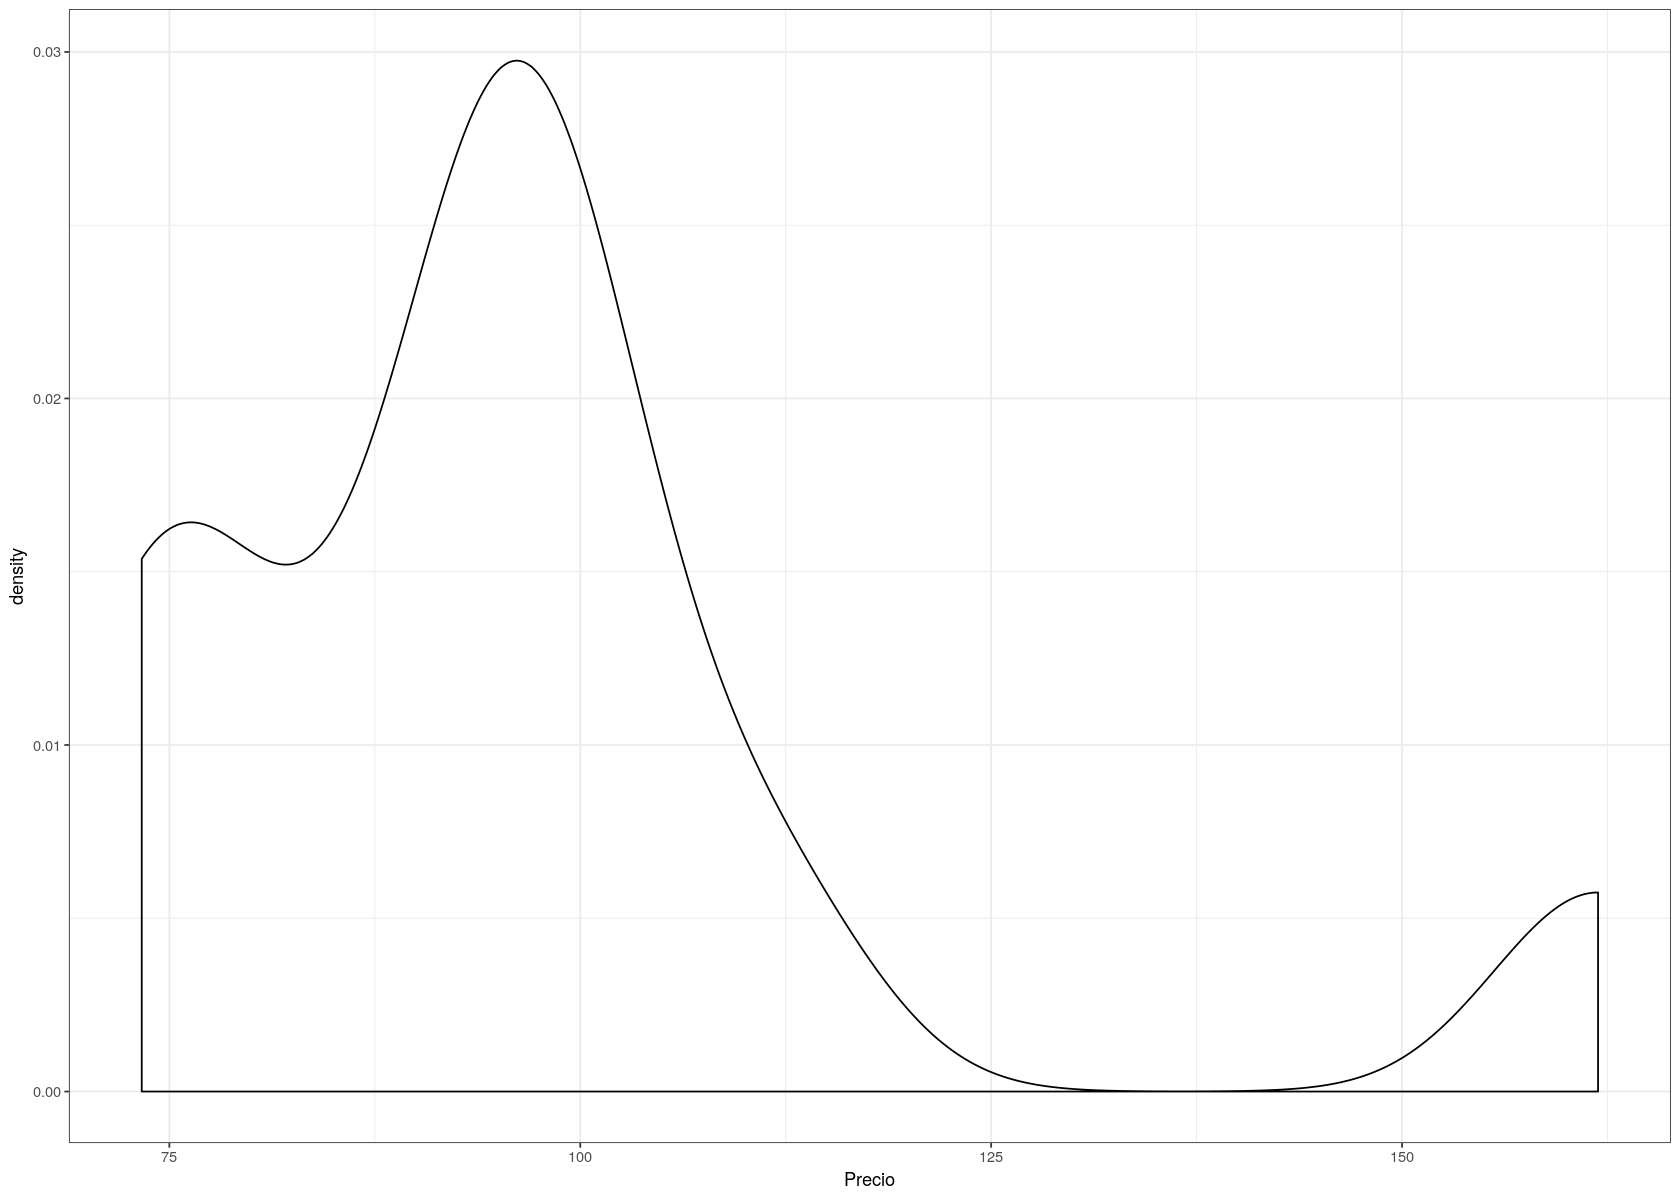

In [23]:
#El gráfico de densidad de los precios
ggplot(dfBarriosPrecioFreqMayorA100, aes(x=Precio))+geom_density()+theme_bw()


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [24]:
# Creo un dataframe para tener los 5 barrios más caros
dfBarriosMasCaros <- dfBarriosPrecioFreqMayorA100[order(-dfBarriosPrecioFreqMayorA100$Precio), ][1:5,]
#Creo un dataframe con los datos de los pies al cuadrado, los convierto a metros y luego elimino la columna de pies
dfBarriosMedidas <- airbnb_entire[, c('Barrio', 'PiesCuadrados')]
dfBarriosMedidas$MetrosCuadrados <- dfBarriosMedidas$PiesCuadrados * 0.3048
dfBarriosMedidas$PiesCuadrados<-NULL
# Saco la media de los metros cuadrados por barrio
dfBarriosMedidas <- aggregate(MetrosCuadrados ~ Barrio, dfBarriosMedidas, mean, na.rm = T )
# Hago un merge con el dataframe de los barrios más caros
dfBarriosPreciosMedidas <- merge(dfBarriosMasCaros, dfBarriosMedidas, by='Barrio')
print(dfBarriosPreciosMedidas)


     Barrio Frecuencia    Precio MetrosCuadrados
1      Goya        142 111.33803       169.57040
2  Justicia        534  98.25468        93.59153
3 Recoletos        135 161.92537        87.47760
4       Sol        701 100.75036       149.66188
5 Trafalgar        223  98.57848        96.14263


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

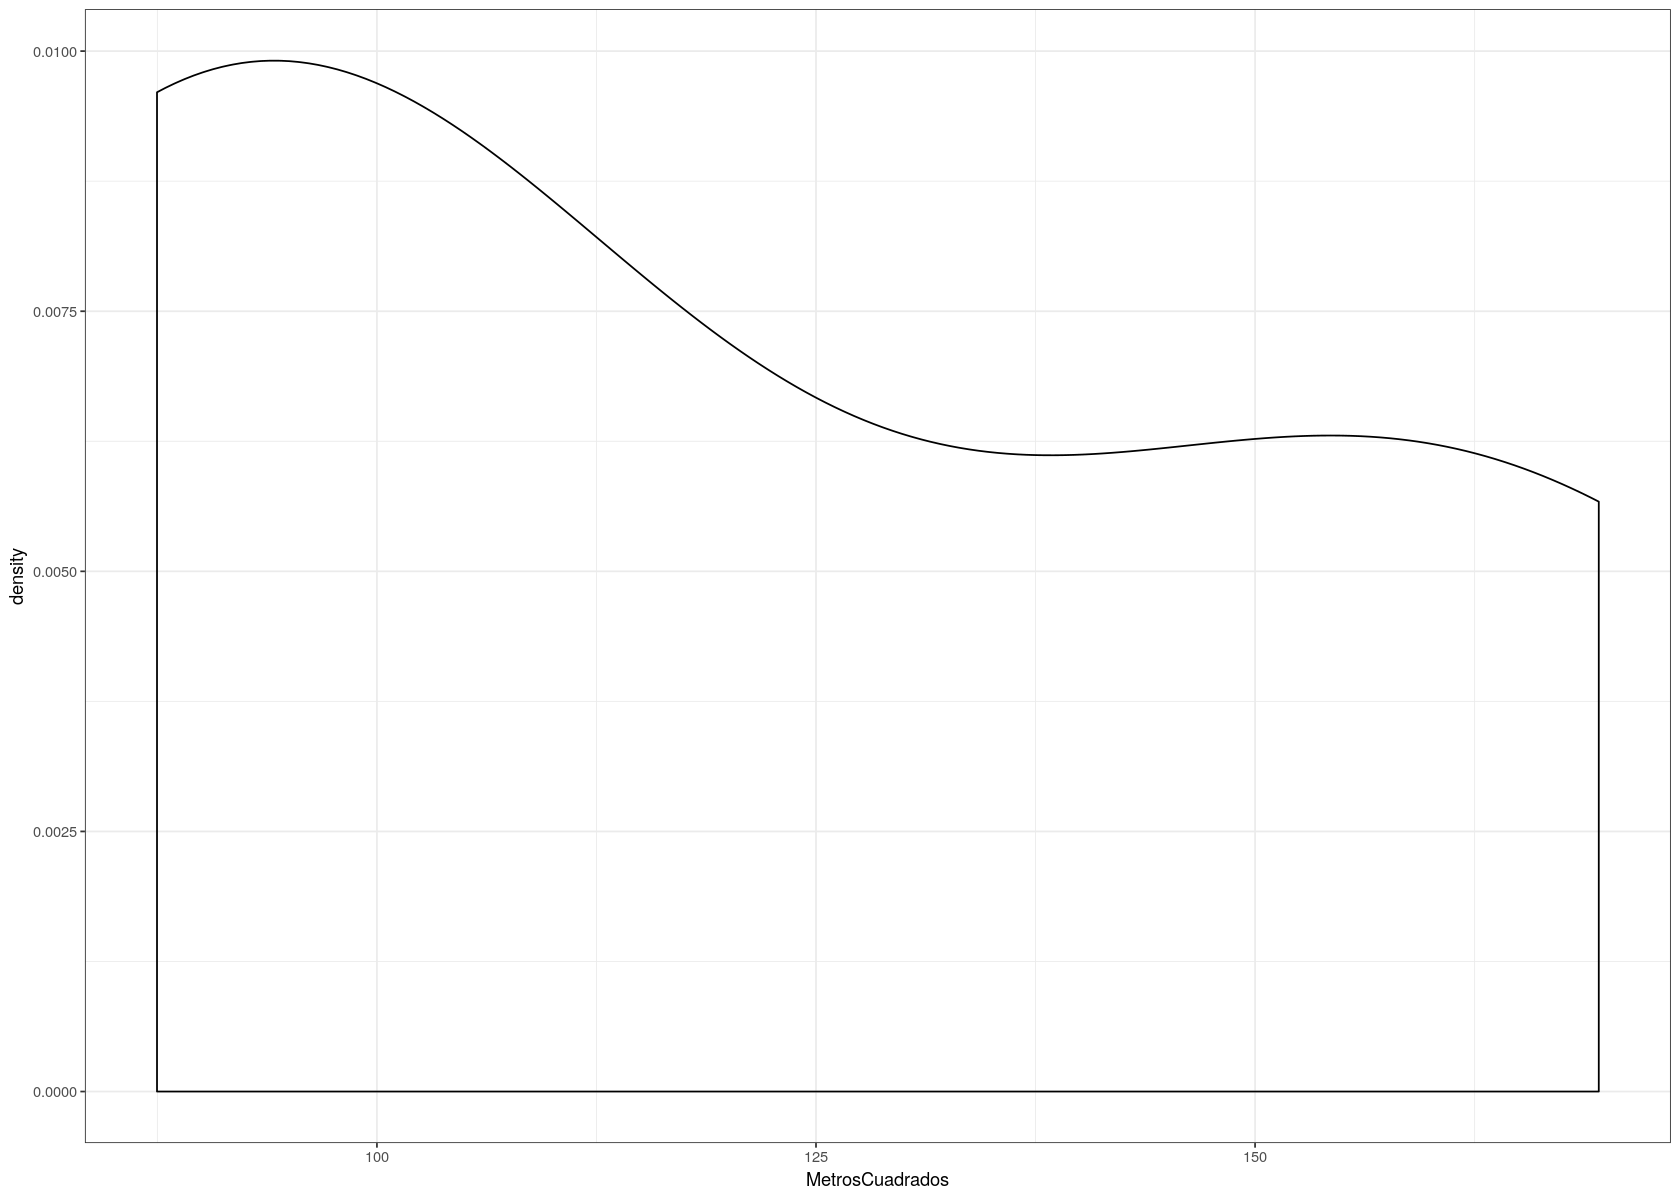

In [25]:
ggplot(dfBarriosPreciosMedidas, aes(x=MetrosCuadrados))+geom_density()+theme_bw()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [26]:
print(
    paste(
        "Asumiendo el valor de Shapiro:",
        round(as.numeric(shapiro.test(dfBarriosPreciosMedidas$MetrosCuadrados)["p.value"]), 2),
        " como un valor no suficientemente alto como para considerar que podemos estar frente a una distribución Gaussiana.",
        " Usamos el test kruskal para el estudio."
    )
)

# Realizamos los cálculos para hacer el test Anova
vectorElementos <- dfBarriosPreciosMedidas$MetrosCuadrados
str(vectorElementos)

dfElementos <- data.frame(value=vectorElementos,cl='MetrosCuadrados')

kruskal.test( value ~ cl, data=dfValoresUnidos)

print('El test Kruskal nos dice que el valor de p es de 0.55, entendemos que sí son medias estadísticamente diferentes.')



[1] "Asumiendo el valor de Shapiro: 0.12  como un valor no suficientemente alto como para considerar que podemos estar frente a una distribución Gaussiana.  Usamos el test kruskal para el estudio."
 num [1:5] 169.6 93.6 87.5 149.7 96.1



	Kruskal-Wallis rank sum test

data:  value by cl
Kruskal-Wallis chi-squared = 1.1976, df = 2, p-value = 0.5495


[1] "El test Kruskal nos dice que el valor de p es de 0.55, entendemos que sí son medias estadísticamente diferentes."


Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [27]:
barrio_sol <- subset(airbnb_entire, Barrio=='Sol')

numBanyos <- barrio_sol$NumBanyos
numDormitorios <- barrio_sol$NumDormitorios
maxOcupantes <- barrio_sol$MaxOcupantes
metrosCuadrados <- barrio_sol$MetrosCuadrados

dfValoresBarrioSol <- data.frame(numBanyos, numDormitorios, maxOcupantes, metrosCuadrados)
cov(dfValoresBarrioSol, use="complete.obs")

,numBanyos,numDormitorios,maxOcupantes,metrosCuadrados
numBanyos,0.3883475,0.5016949,1.233898,15.67569
numDormitorios,0.5016949,1.3717514,2.595480,34.74173
maxOcupantes,1.2338983,2.5954802,7.961582,63.10959
metrosCuadrados,15.6756885,34.7417329,63.109585,2722.95099


Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [28]:
numBanyos <- barrio_sol$NumBanyos
numDormitorios <- barrio_sol$NumDormitorios
maxOcupantes <- barrio_sol$MaxOcupantes
metrosCuadrados <- barrio_sol$MetrosCuadrados

print(
    paste(
        "Según la correlación entre los diferentes datos, no nos podríamos fiar de los metros cuadrados. ",
        "No es lógico que exista tan poca correlación entre el número de mestros cuadrados en una casa y el número de baños, dormitorios."
    )
)
corValores <- cor(cbind(numBanyos, numDormitorios, maxOcupantes, metrosCuadrados ), use="complete" )
corValores


[1] "Según la correlación entre los diferentes datos, no nos podríamos fiar de los metros cuadrados.  No es lógico que exista tan poca correlación entre el número de mestros cuadrados en una casa y el número de baños, dormitorios."


,numBanyos,numDormitorios,maxOcupantes,metrosCuadrados
numBanyos,1.0000000,0.6873719,0.7017290,0.4820549
numDormitorios,0.6873719,1.0000000,0.7853809,0.5684521
maxOcupantes,0.7017290,0.7853809,1.0000000,0.4286233
metrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (stat_bin).”


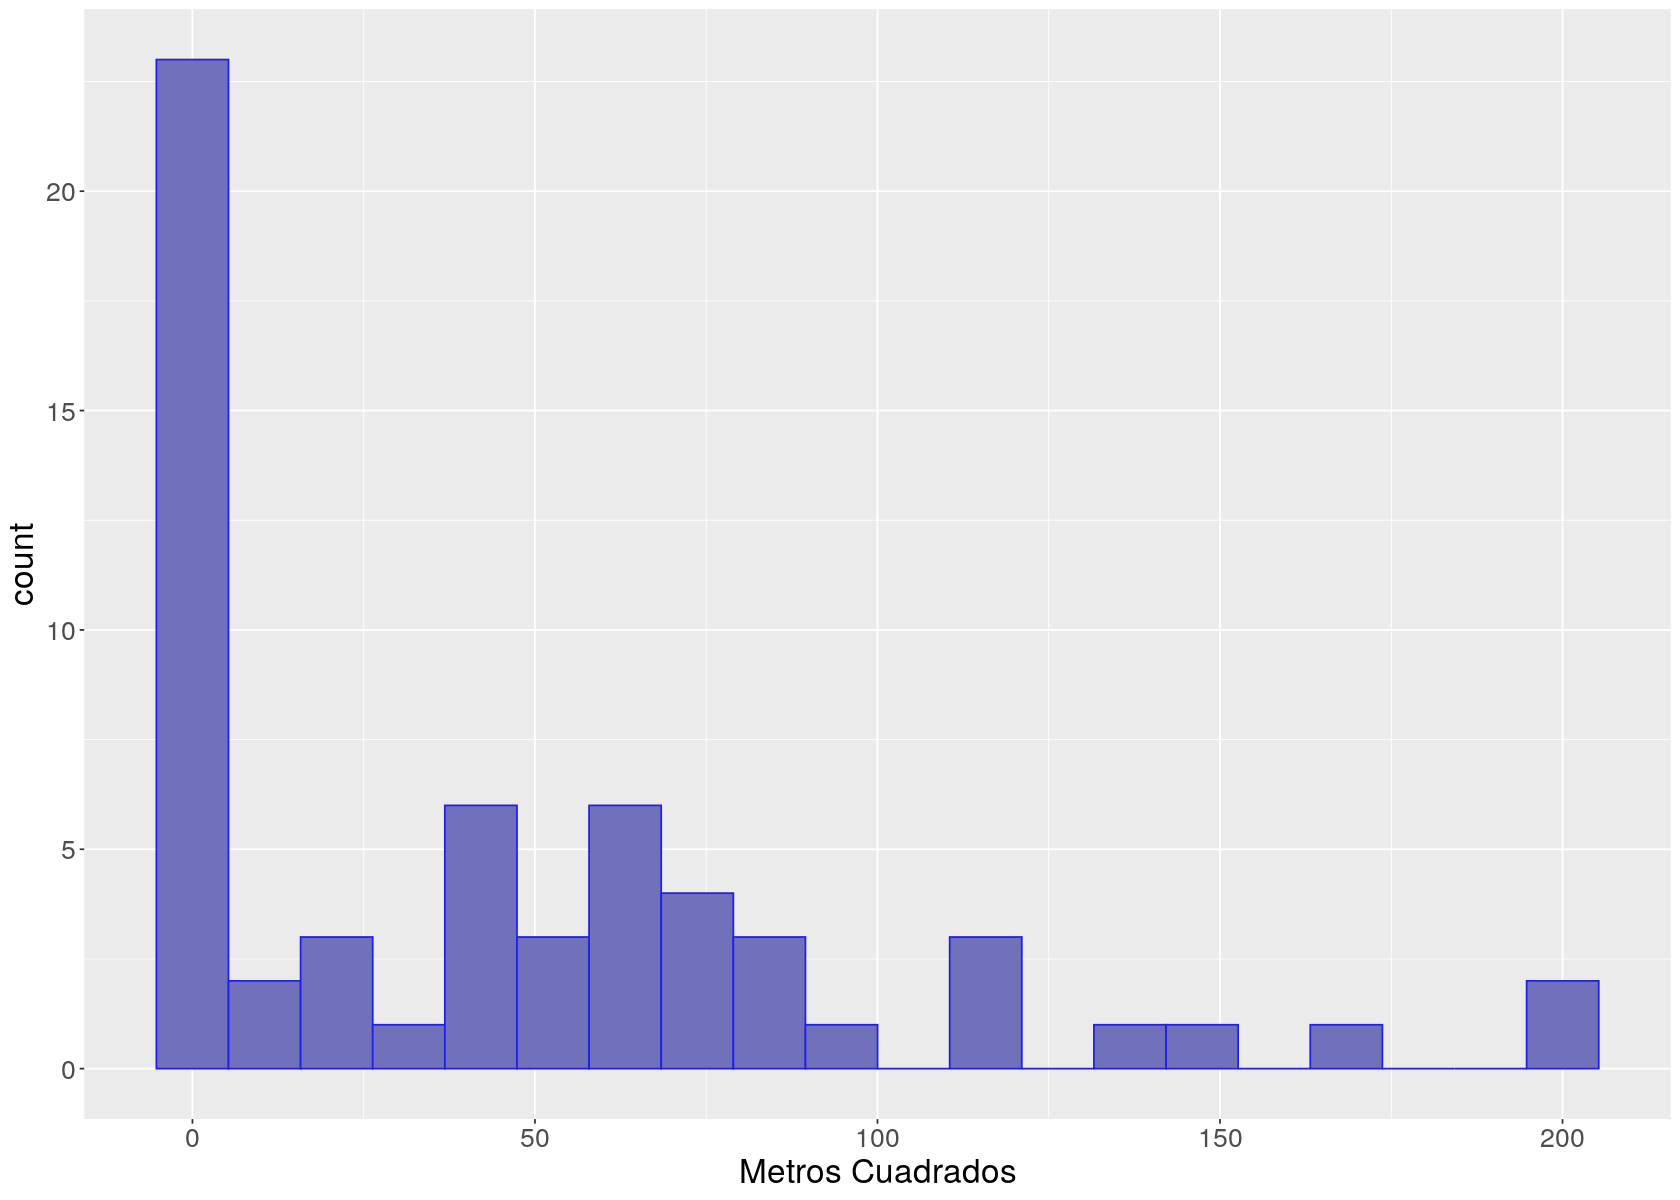

In [29]:
ggplot(data=dfValoresBarrioSol,aes(x=metrosCuadrados))+
   theme(tex=element_text(size=20))+
   geom_histogram(bins=20,fill='#7070BB',color="#2020EE")+
   xlab("Metros Cuadrados")

In [30]:
#Nos quedamos con los datos que tienen un valor lógico en metros cuadrados.
barrio_sol <- na.omit(barrio_sol[barrio_sol$MetrosCuadrados >= 50,])
print(
    paste(
        "Tras analizar el Histograma, vamos a quedarnos con aquellos valores que tengan más de 50 metros cuadrados.",
        "Además vamos a eliminar los valores NA, no hay lógica para mantenerlos.",
        "Nuestros datos quedarían: "
    )
)
barrio_sol

[1] "Tras analizar el Histograma, vamos a quedarnos con aquellos valores que tengan más de 50 metros cuadrados. Además vamos a eliminar los valores NA, no hay lógica para mantenerlos. Nuestros datos quedarían: "


,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>,<dbl>
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,60.01534
25,28012,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hair dryer,Iron",753,100,87,69.95596
574,28014,Sol,Apartment,Entire home/apt,8,2,4,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Fire extinguisher,Shampoo,Hangers,Iron,Laptop friendly workspace",2153,250,99,200.02016
690,28012,Sol,Apartment,Entire home/apt,10,2,2,6,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials",1453,98,94,134.98806
1414,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Pets live on this property,Cat(s),Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",915,70,100,85.00624
1578,28013,Sol,Apartment,Entire home/apt,3,1,0,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Private entrance",646,45,97,60.01534
2422,28012,Sol,Apartment,Entire home/apt,8,1,2,6,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Fire extinguisher,Essentials",883,145,97,82.03335
3804,28005,Sol,Apartment,Entire home/apt,4,1,1,2,Futon,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_50",700,95,90,65.03210
4402,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Hangers,Hair dryer,Iron",646,75,92,60.01534


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [31]:
datosBarrioSol <- barrio_sol[, c("MaxOcupantes", "NumBanyos", "NumDormitorios", "NumCamas", "MetrosCuadrados", "Precio")]
cor(datosBarrioSol, use='complete')
print(
    paste(
        'Según lo que nos muestra la correlación, las tres variables que más influyen son: ',
        'NumDormitorios, MaxOcupantes, MetrosCuadrados. '
    )
)
lmVariables <- glm(data=datosBarrioSol, formula= Precio ~ NumDormitorios+MetrosCuadrados+MaxOcupantes+NumBanyos+NumCamas)
print(
    paste(
        'Tras hacer el modelo',
        'NumDormitorios, MaxOcupantes, NumCamas y MetrosCuadrados. ',
        'serían las variables que más afectan al precio.',
        'Sin embargo, la variable que más incidencia parece tener es NumDormitorios',
        'así parece reflejarse en el resumen del modelo y en los .'
    )
)
# Resumen del modelo
print(summary(lmVariables))
# Coeficientes del modelo
print(lmVariables$coefficients)

,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,MetrosCuadrados,Precio
MaxOcupantes,1.0000000,0.8563304,0.7599340,0.8919924,0.5579949,0.7547968
NumBanyos,0.8563304,1.0000000,0.6946567,0.7357010,0.5263001,0.6958775
NumDormitorios,0.7599340,0.6946567,1.0000000,0.7998765,0.7822484,0.8788471
NumCamas,0.8919924,0.7357010,0.7998765,1.0000000,0.5823008,0.6858189
MetrosCuadrados,0.5579949,0.5263001,0.7822484,0.5823008,1.0000000,0.7454525
Precio,0.7547968,0.6958775,0.8788471,0.6858189,0.7454525,1.0000000


[1] "Según lo que nos muestra la correlación, las tres variables que más influyen son:  NumDormitorios, MaxOcupantes, MetrosCuadrados. "
[1] "Tras hacer el modelo NumDormitorios, MaxOcupantes, NumCamas y MetrosCuadrados.  serían las variables que más afectan al precio. Sin embargo, la variable que más incidencia parece tener es NumDormitorios así parece reflejarse en el resumen del modelo y en los ."

Call:
glm(formula = Precio ~ NumDormitorios + MetrosCuadrados + MaxOcupantes + 
    NumBanyos + NumCamas, data = datosBarrioSol)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-71.805   -9.113    3.940   20.786   53.803  

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      -6.3305    21.8418  -0.290  0.77545   
NumDormitorios   35.5854    10.9271   3.257  0.00465 **
MetrosCuadrados   0.2212     0.2380   0.929  0.36575   
MaxOcupantes     13.3723     7.5544   1.770  0.09463 . 
NumBanyos        -0.4880    16.8312  -0.029  0.97721   
N

¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [32]:
#Modelo Habitaciones
modelNumHabitaciones <- lm(data=datosBarrioSol, formula = Precio~NumDormitorios)
summary(modelNumHabitaciones)

#Modelo Metros Cuadrados
modelMetrosCuadrados <- lm(data=datosBarrioSol, formula = Precio~MetrosCuadrados)
summary(modelMetrosCuadrados)

print(
    paste(
        "Según parecen confirmar los análisis de cada uno de los modelos,",
        "el número de dormitorios parece influir más en el precio."
    )
)




Call:
lm(formula = Precio ~ NumDormitorios, data = datosBarrioSol)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.648  -17.269   -3.242   20.082   48.352 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.891     12.534   2.784   0.0111 *  
NumDormitorios   43.351      5.136   8.441 3.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32.87 on 21 degrees of freedom
Multiple R-squared:  0.7724,	Adjusted R-squared:  0.7615 
F-statistic: 71.26 on 1 and 21 DF,  p-value: 3.445e-08



Call:
lm(formula = Precio ~ MetrosCuadrados, data = datosBarrioSol)

Residuals:
    Min      1Q  Median      3Q     Max 
-68.786 -35.244   1.585   8.437 116.570 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      17.5027    22.7873   0.768    0.451    
MetrosCuadrados   1.1059     0.2158   5.125 4.46e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 45.92 on 21 degrees of freedom
Multiple R-squared:  0.5557,	Adjusted R-squared:  0.5345 
F-statistic: 26.27 on 1 and 21 DF,  p-value: 4.465e-05


[1] "Según parecen confirmar los análisis de cada uno de los modelos, el número de dormitorios parece influir más en el precio."


Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [33]:
p<-0.05
covMetrosCuadrados <- vcov(modelMetrosCuadrados)
error<-qt(1-p/2,nrow(datosBarrioSol)-2)*sqrt(covMetrosCuadrados[2,2])
paste("Intervalo de confianza del 95% del aumento en euros por cada metro cuadrado extra: [",
      modelMetrosCuadrados$coefficients[2]-error,",",modelMetrosCuadrados$coefficients[2]+error,"]")

[1] "Intervalo de confianza del 95% del aumento en euros por cada metro cuadrado extra: [ 0.657147111445341 , 1.55465323762361 ]"

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [34]:
modelNumHabitaciones$coefficients
p<-0.05
vcovHabitaciones <- vcov(modelNumHabitaciones)
error<-qt(1-p/2,nrow(datosBarrioSol)-2)*sqrt(vcovHabitaciones[2,2])
paste("Intervalo de confianza del 95% del aumento en euros por cada habitación extra: [",
      modelNumHabitaciones$coefficients[2]-error,",",modelNumHabitaciones$coefficients[2]+error,"]")


(Intercept) NumDormitorios 
      34.89066       43.35138

[1] "Intervalo de confianza del 95% del aumento en euros por cada habitación extra: [ 32.6712787195702 , 54.0314813653555 ]"

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

In [35]:
numeroDormitorios <- 3
datos <- datosBarrioSol$NumDormitorios == numeroDormitorios
nElementos <- length(datos)
smElementos <- sum(datos)

print(
    paste(
        'Según la función:',
        'El margen de error estaría entre: 0.01070997 0.28037934',
        'Y la probabilidad de encontrar un apartamento con 3 dormitorios sería: 0.08695652'
    )
)
print(
    binom.test(smElementos,nElementos)
)


[1] "Según la función: El margen de error estaría entre: 0.01070997 0.28037934 Y la probabilidad de encontrar un apartamento con 3 dormitorios sería: 0.08695652"

	Exact binomial test

data:  smElementos and nElementos
number of successes = 2, number of trials = 23, p-value = 6.604e-05
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.01070997 0.28037934
sample estimates:
probability of success 
            0.08695652 

